<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/035_intro_matplotlib.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(intro-matplotlib-notebook)=
# Introduzione a Matplotlib 

Matplotlib è la libreria Python più comune per la creazione di grafici. Possiamo caricare il modulo `pyplot` utilizzando la seguente istruzione. Utilizzando la parola chiave `as`, possiamo assegnare un alias al modulo importato, che è un nome più breve per fare riferimento alle sue funzioni e metodi. Ad esempio, nell'esempio seguente potremo accedere alle funzioni e ai metodi del modulo `matplotlib.pyplot` utilizzando semplicemente l'alias `plt`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "svg"

La linea di codice `%matplotlib inline` fa riferimento a una caratteristica dei nootbook Juupyter: tutte le linee che iniziano con il carattere `%` vengono chiamate *line magic* e permettono di effettuare operazioni supplementari. In questo caso si tratta di una *matplotlib magic* che specifica che i grafici prodotti da matplotlib devono essere visualizzati direttamente nel notebook (senza questa operazione i grafici non verrebbero mostrati automaticamente). È sufficiente specificare la *matplotlib magic* una sola volta, all'inizio del notebook oppure prima di produrre il primo grafico da visualizzare. Da quel punto in avanti tutti i grafici verranno automaticamente mostrati nel notebook. 

## Il modulo pyplot

L'istruzione `fig, ax = plt.subplots()` viene utilizzata per creare una figura e un set di assi (ovvero, subplot) all'interno di quella figura. Con l'istruzione seguente generiamo semplicemente una figura vuota.

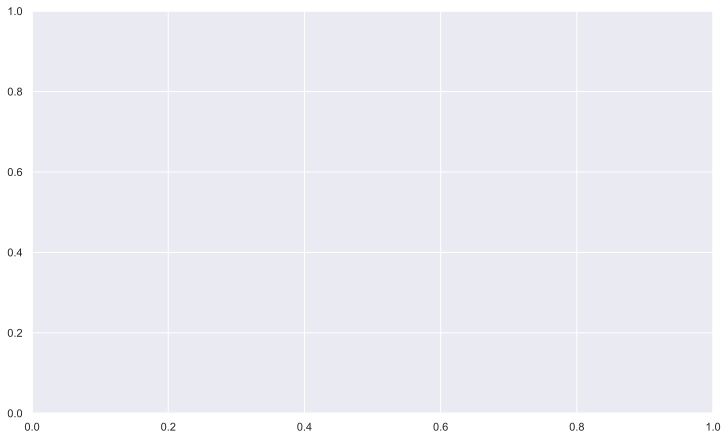

In [12]:
fig, ax = plt.subplots()

Supponiamo di avere i seguenti dati.

In [13]:
# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

Possiamo generare un diagramma a dispersione con il `scatter`. Le etichette per gli assi $x$ e $y$ possono essere specificate con i metodi `set_xlabel`, `set_xlabel`. Il titolo viene specificato mediante il metodo `set_title`.

Text(0.5, 1.0, 'some title')

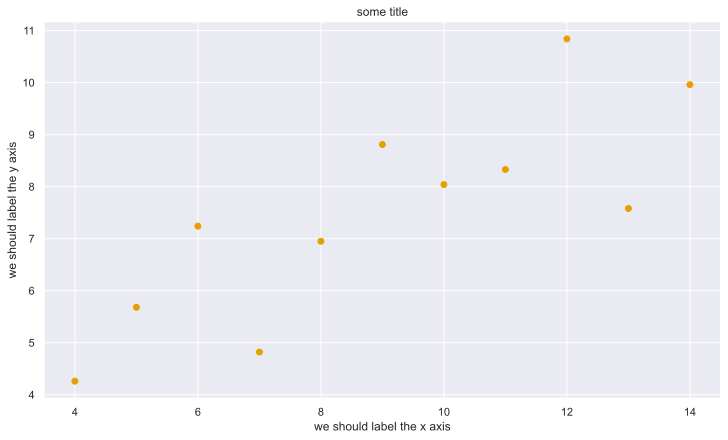

In [15]:
fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")
ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

### Funzione `plot`

Le quantità da plottare sono `ndarrays`, ma anche una lista viene trasformata direttamente in un array quando viene passata come argomento del plot. Esempio:

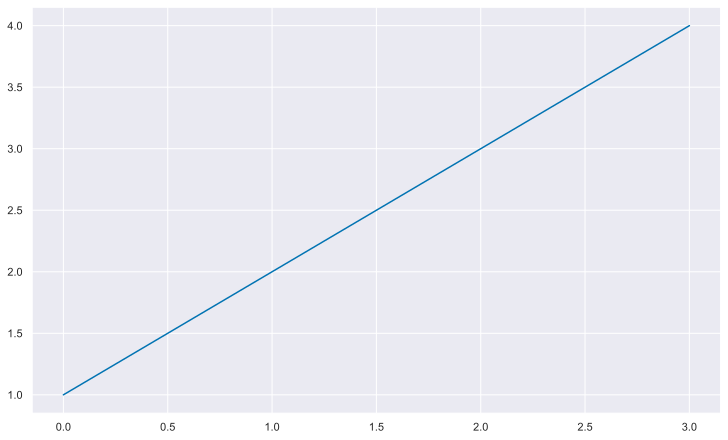

In [17]:
fig, ax = plt.subplots()
_ = ax.plot([1, 2, 3, 4])


Una lista unica viene interpretata come la funzione da plottare lungo  y, ma se ne passiamo due la prima viene interpretata come asse  x. Infine, una stringa come terzo parametro viene interpretata come un descrittore per il colore della linea, lo stile, ecc.

Esempio: disegno di dati contenuti in due liste con linea continua (parametro '-') e pallini rossi (parametro 'or')...

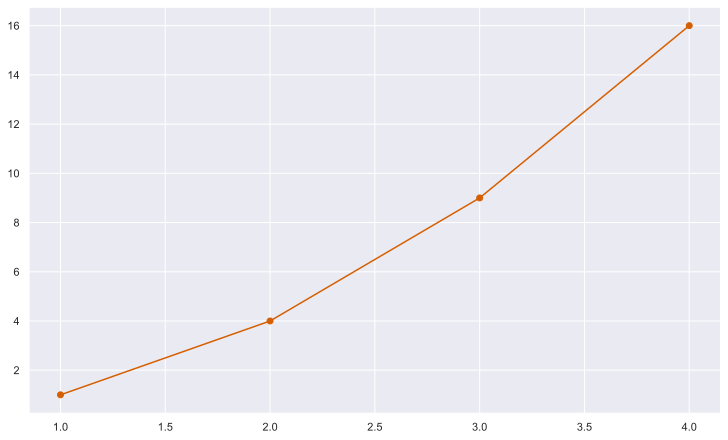

In [18]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

fig, ax = plt.subplots()
_ = ax.plot(x, y, "or-")


Oppure si possono definire due o più `ndarrays`, da passare al plot. Nell'esempio seguente vengono definite due funzioni da rappresentare in un unico grafico (si noti il colore differente prima del  `-`):

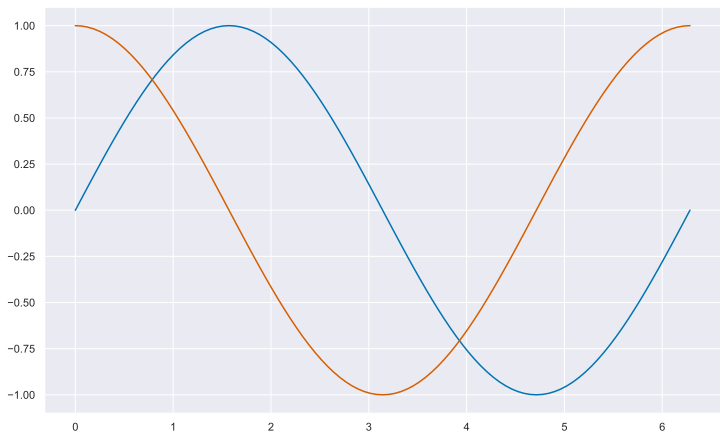

In [20]:
x = np.linspace(0.0, 2.0 * np.pi, 101)
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y, "b-")
_ = ax.plot(x, z, "r-")

Possiamo anche scrivere, in maniera più succinta, quanto segue

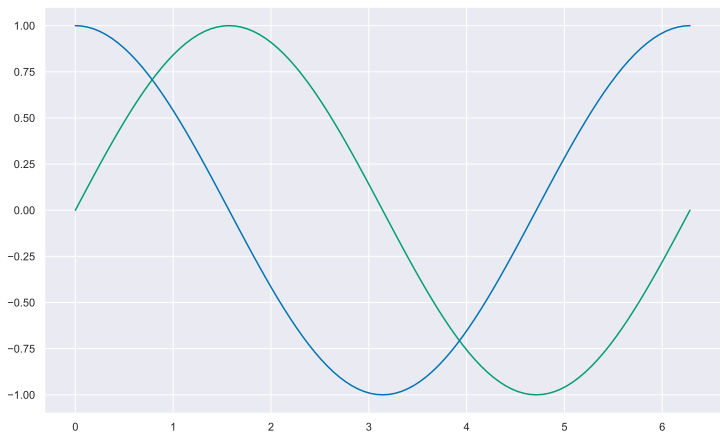

In [22]:
fig, ax = plt.subplots()
_ = ax.plot(x, y, "g-", x, z, "b-")

La stringa (opzionale) che appare come terzo parametro (se non specificata, disegna una linea blu) descrive il colore, un eventuale marker e lo stile della linea in un unico parametro. È possibile definire i colori comuni con le lettere seguenti:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Il parametro successivo, se presente, rappresenta il tipo di linea e l'eventuale punto (eventualmente entrambi, se presenti). I simboli corrispondenti sono:

- -: solid line style
- --: dashed line style
- -.: dashed-dotted line style
- :: dotted line style
- .: point marker
- ,: pixel marker
- o: circle marker
- v: triangle down marker
- ^: triangle up marker
- <: triangle left marker
- s: square marker
- p: pentagon marker
- *: star marker
- h: hexagon marker
- +: plus marker
- x: x marker
- D: diamond marker
- |: vertical line marker
- _: horizonthal line marker

Alcuni dei possibili parametri opzionali che è possibile passare alla funzione plot sono:

- alpha: trasparenza della linea (float: 0.0 = trasparente, 1.0 = opaca)
- color (o "c"): colore della linea
- linestyle (o "ls"): stile della linea
- linewidth (o "lw"): larghezza della linea (float)
- marker: tipo di marker
- markersize (o "ms"): dimensione del marker (float)
- markevery: ogni quanti punti mettere un marker (ma si possono specificare anche markers singoli, ecc.)

Esempio:

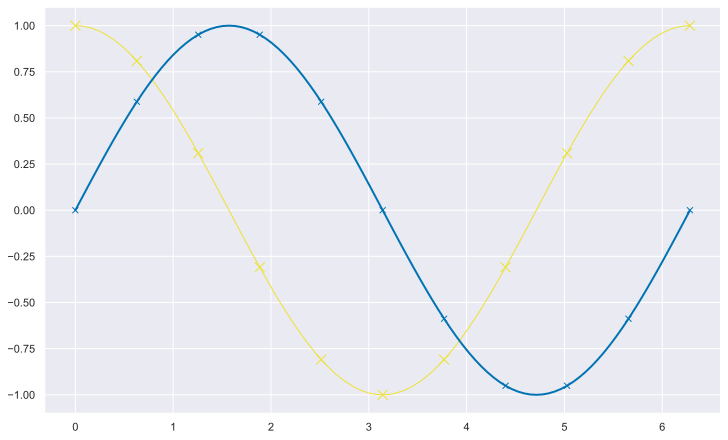

In [24]:
fig, ax = plt.subplots()
ax.plot(x, z, ls="-", lw=1.0, marker="x", markersize=10.0, color="y", markevery=(10))
_ = ax.plot(x, y, linestyle="-", linewidth=2.0, color="b", marker="x", markevery=(10))

## Notazione `plt.subplots()`

Il modo prescritto per creare una figura con un singolo grafico usa la notazione `plt.subplots()`. 

In [ ]:
fig, ax = plt.subplots()

L'istruzione precedente assegna una variabile separata a ciascuno dei due risultati ritornati da `plt.subplots()`. Si noti non abbiamo passato alcun argomento a `plt.subplots()`. La chiamata predefinita è `subplots(nrows=1, ncols=1)`. Di conseguenza, creiamo un singolo grafico, come indicato sopra.

Consideriamo ora un caso in cui abbiamo due grafici arrangiati orizzontalmente. Definiamo delle coordinate.

In [25]:
x1 = [1, 2, 3, 4, 5]
y1 = [11, 22, 33, 44, 55]
x2 = [2, 3, 4, 5, 6]
y2 = [77, 66, 55, 44, 33]

Si notino gli argomenti `nrows=1` e `ncols=2`, insieme all'uso di `ax1` e `ax2`.

Text(0, 0.5, '$y_2$')

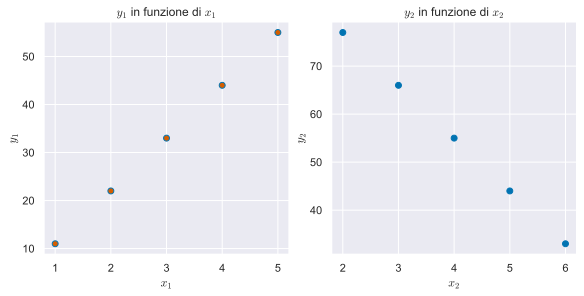

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x1, y=y1, marker="o", c="r", edgecolor="b")
ax1.set_title("$y_1$ in funzione di $x_1$")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$y_1$")

ax2.scatter(x=x2, y=y2, marker="o", c="b", edgecolor="b")
ax2.set_title("$y_2$ in funzione di $x_2$")
ax2.set_xlabel("$x_2$")
ax2.set_ylabel("$y_2$")

Facciamo un altro esempio usando i dati `penguins.csv`.

In [14]:
import pandas as pd

In [27]:
df = pd.read_csv('data/penguins.csv')
df.dropna(inplace=True)

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_260/4251014454.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # handle overlaps


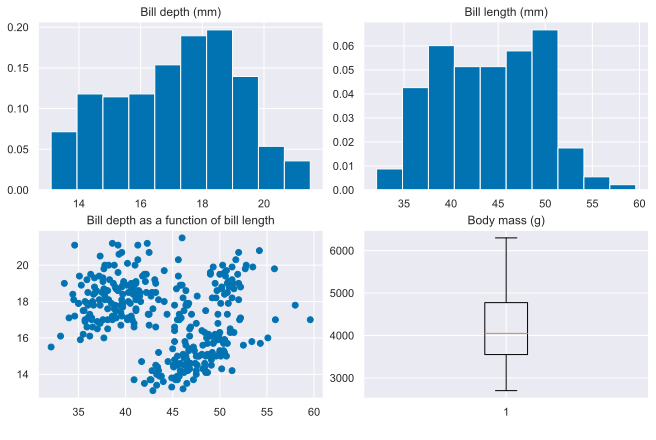

In [29]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
ax0.hist(df["bill_depth_mm"], 10, density=True)
ax0.set_title('Bill depth (mm)')
ax1.hist(df["bill_length_mm"], 10, density=True)
ax1.set_title('Bill length (mm)')
ax2.scatter(x=df["bill_length_mm"],  y=df["bill_depth_mm"])
ax2.set_title('Bill depth as a function of bill length')
ax3.boxplot(df["body_mass_g"])
ax3.set_title('Body mass (g)')
ax3.set_xlabel(" ")
fig.tight_layout() # handle overlaps

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w